# Лабораторная работа 6. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнила студентка группы БСТ2004 Мельникова Елена Михайловна


### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Варианты заданий:

Вариант | Задание
:-------- |:-----
1, 7, 13, 19, 25 | Алгоритм Флойда-Уоршелла
2, 8, 14, 20, 26 | Алгоритм Дейкстры
3, 9,15,21,27 | Алгоритм Беллмана-Форда
4, 10, 16, 22, 28 | Алгоритм Джонсона
5, 11, 17, 23, 29| Алгоритм Левита
6, 12, 18, 24, 30 | Алгоритм Йена



### Библиотеки

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import time

### Алгоритм Белмана-Форда

In [32]:
def shortest_path(nodes, edges, start_node):
    num_node = len(nodes)
    num_edge = len(edges)
    distance, parent = [None] * num_node, [None] * num_node
    distance[start_node] = 0
    times, flag = 0, True

    def slack(edge, distance, parent):
        u, v, w = edge[0], edge[1], edge[2]
        if distance[u] == None:
            return False
        elif distance[v] == None or distance[u]+w < distance[v]:
            distance[v] = distance[u]+w
            parent[v] = u
            return True
        return False
            

    while flag and times < num_node-1:
        flag = False
        for i in range(num_edge):
            if slack(edges[i], distance, parent) and not flag:
                flag = True
        times += 1
    return distance, parent

def get_nodes_edges(parent, end_node):
    nodes, edges = [], []
    v = end_node
    nodes.append(v)
    while parent[end_node] != None:
        u = parent[end_node]
        nodes.append(u)
        edges.append((u, v))
        end_node = u
        v = u
    return nodes[::-1], edges[::-1]

def all_nodes(matrix):           # Записывает все вершины в список
    nodes = []
    for i in range(len(matrix[0])):
        nodes.append(i)
    return nodes

def all_edges(matrix):           # Записывает все рёбра в список с кортежами (первая вершина, вторая, вес)
    edges = []
    for i in range(len(matrix[0])):
        for j in range(len(matrix[0])):
            if matrix[i][j] != 0:
                edges.append((i , j , matrix[i][j]))
    return edges  


def draw(DG, color_nodes, color_edges):
    edges = list(DG.edges)
    num_nodes = DG.number_of_nodes() 
    num_edges = DG.number_of_edges()
    node_color = ['#ff9966'] * num_nodes 
    edge_color = ['#ff9966'] * num_edges 

    for i in color_nodes:
        node_color[i] = '#333333'

    for i in range(num_edges):
        u, v = edges[i][0], edges[i][1]
        if (u, v) in set(color_edges):
            edge_color[i] = '#333333'
            
    pos = nx.circular_layout(DG)
    nx.draw(DG, pos, with_labels=True, node_color=node_color, edge_color=edge_color, font_color='#ffffff') 
    edge_labels = nx.get_edge_attributes(DG, 'weight')
    nx.draw_networkx_edge_labels(DG, pos, edge_labels=edge_labels) 

Введите начало:
1
Введите конец:
4
[1, 2, 4]
Время выполнения:0.000396 сек


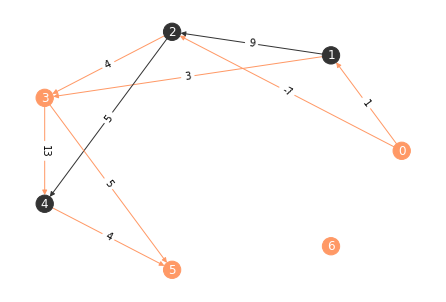

In [36]:
file = open('matrix2.txt')
matrix = [list(map(int, row.split())) for row in file.readlines()] # Читаем матрицу из файла 
nodes = all_nodes(matrix) #Вершины
edges = all_edges(matrix) #Рёбра
print('Введите начало:')
start_node = int(input())
print('Введите конец:')
end_node = int(input())
t = time.perf_counter()
distance, parent = shortest_path(nodes, edges, start_node)
# pass_nodes - кратчайший путь 
# pass_edges - кратчайший путь в виде саписка с котрежами 
pass_nodes, pass_edges = get_nodes_edges(parent, end_node)  
time = 'Время выполнения' + ':{0:.6f} сек'.format((time.perf_counter() - t))
print (pass_nodes) 
print(time)
DG = nx.DiGraph()
DG.add_nodes_from(nodes)
DG.add_weighted_edges_from(edges)
draw(DG, pass_nodes, pass_edges)

Кол-во узлов | Время
:--- |:-----
3 | 0.000127
4 | 0.000217
5 | 0.000370
6 | 0.000459
